In [ ]:
import yfinance as yf
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_score
import pandas as pd

In [ ]:
sp500= yf.Ticker("^GSPC")

In [ ]:
sp500= sp500.history(period="max")

In [ ]:
sp500


,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
1927-12-30 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,0.0,0.0
1928-01-03 00:00:00-05:00,17.760000,17.760000,17.760000,17.760000,0,0.0,0.0
1928-01-04 00:00:00-05:00,17.719999,17.719999,17.719999,17.719999,0,0.0,0.0
1928-01-05 00:00:00-05:00,17.549999,17.549999,17.549999,17.549999,0,0.0,0.0
1928-01-06 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,0.0,0.0
...,...,...,...,...,...,...,...
2024-08-29 00:00:00-04:00,5607.299805,5646.950195,5583.709961,5591.959961,3065640000,0.0,0.0
2024-08-30 00:00:00-04:00,5612.740234,5651.370117,5581.790039,5648.399902,4185850000,0.0,0.0
2024-09-03 00:00:00-04:00,5623.890137,5623.890137,5504.330078,5528.930176,3866350000,0.0,0.0


In [ ]:
sp500.index

DatetimeIndex(['1927-12-30 00:00:00-05:00', '1928-01-03 00:00:00-05:00',
               '1928-01-04 00:00:00-05:00', '1928-01-05 00:00:00-05:00',
               '1928-01-06 00:00:00-05:00', '1928-01-09 00:00:00-05:00',
               '1928-01-10 00:00:00-05:00', '1928-01-11 00:00:00-05:00',
               '1928-01-12 00:00:00-05:00', '1928-01-13 00:00:00-05:00',
               ...
               '2024-08-22 00:00:00-04:00', '2024-08-23 00:00:00-04:00',
               '2024-08-26 00:00:00-04:00', '2024-08-27 00:00:00-04:00',
               '2024-08-28 00:00:00-04:00', '2024-08-29 00:00:00-04:00',
               '2024-08-30 00:00:00-04:00', '2024-09-03 00:00:00-04:00',
               '2024-09-04 00:00:00-04:00', '2024-09-05 00:00:00-04:00'],
              dtype='datetime64[ns, America/New_York]', name='Date', length=24286, freq=None)

<Axes: xlabel='Date'>

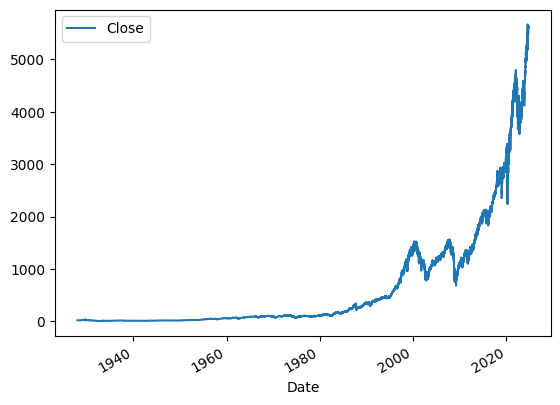

In [ ]:
sp500.plot.line(y="Close", use_index=True)

In [ ]:
del sp500["Dividends"]
del sp500["Stock Splits"]

In [ ]:
#have a column that show's tomorrow's price on the current day
sp500["Tomorrow"]= sp500["Close"].shift(-1)

In [ ]:
sp500

,Open,High,Low,Close,Volume,Tomorrow
Date,,,,,,
1927-12-30 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,17.760000
1928-01-03 00:00:00-05:00,17.760000,17.760000,17.760000,17.760000,0,17.719999
1928-01-04 00:00:00-05:00,17.719999,17.719999,17.719999,17.719999,0,17.549999
1928-01-05 00:00:00-05:00,17.549999,17.549999,17.549999,17.549999,0,17.660000
1928-01-06 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,17.500000
...,...,...,...,...,...,...
2024-08-29 00:00:00-04:00,5607.299805,5646.950195,5583.709961,5591.959961,3065640000,5648.399902
2024-08-30 00:00:00-04:00,5612.740234,5651.370117,5581.790039,5648.399902,4185850000,5528.930176
2024-09-03 00:00:00-04:00,5623.890137,5623.890137,5504.330078,5528.930176,3866350000,5520.069824


In [ ]:
#return a boolean (and collect it as int) for whether tomorrow's price is increasing or not
sp500["Target"] = (sp500["Tomorrow"]>sp500["Close"]).astype(int)

In [ ]:
#remove early data to account for changes in the market over time
sp500= sp500.loc["1990-01-01":].copy()
sp500

,Open,High,Low,Close,Volume,Tomorrow,Target
Date,,,,,,,
1990-01-02 00:00:00-05:00,353.399994,359.690002,351.980011,359.690002,162070000,358.760010,0
1990-01-03 00:00:00-05:00,359.690002,360.589996,357.890015,358.760010,192330000,355.670013,0
1990-01-04 00:00:00-05:00,358.760010,358.760010,352.890015,355.670013,177000000,352.200012,0
1990-01-05 00:00:00-05:00,355.670013,355.670013,351.350006,352.200012,158530000,353.790009,1
1990-01-08 00:00:00-05:00,352.200012,354.239990,350.540009,353.790009,140110000,349.619995,0
...,...,...,...,...,...,...,...
2024-08-29 00:00:00-04:00,5607.299805,5646.950195,5583.709961,5591.959961,3065640000,5648.399902,1
2024-08-30 00:00:00-04:00,5612.740234,5651.370117,5581.790039,5648.399902,4185850000,5528.930176,0
2024-09-03 00:00:00-04:00,5623.890137,5623.890137,5504.330078,5528.930176,3866350000,5520.069824,0


In [ ]:
#Using randomforest first because it analyzes multiple decision trees, is fast, and is resistant to overfitting

#n_estimators is number of decision trees we want to train
#min_samples_split: the higher we set it, the less accurate the model will be, but also a lower chance of overfitting
model = RandomForestClassifier(n_estimators=100, min_samples_split=100, random_state=1)

#train the model without providing it much information about the future: if it had future info, the training would look really good, but the testing would be inaccurate
train= sp500.iloc[:-100]
test = sp500.iloc[-100:]

predictors = ["Close", "Volume", "High", "Low", "Open"]
model.fit(train[predictors], train["Target"])

RandomForestClassifier(min_samples_split=100, random_state=1)

In [ ]:
#precision score to check the percent of time that the market actually went up when the model thought it would

predictions= model.predict(test[predictors])

In [ ]:
predictions = pd.Series(predictions, index=test.index)

In [ ]:
precision_score(test["Target"], predictions)

0.5833333333333334

<Axes: xlabel='Date'>

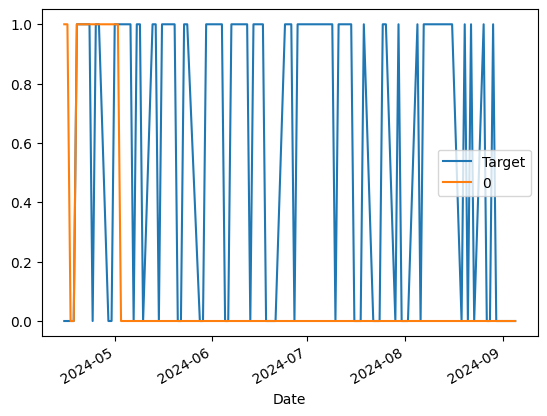

In [ ]:
combined = pd.concat([test["Target"], predictions], axis=1)
combined.plot()

In [ ]:
#building a backtesting system

def predict(train, test, predictors, model):
  model.fit(train[predictors], train["Target"])
  predictions= model.predict(test[predictors])
  predictions = pd.Series(predictions, index=test.index, name="Predictions")
  combined = pd.concat([test["Target"], predictions], axis=1)
  return combined

In [ ]:
#a trading year has about 250 days; by setting start to 2500, we are saying to take about 10 years of data to train the model, one year step size at a time
def backtest(data, model, predictors, start=2500, step=250):
  #list of dataframes for each year
  all_predictions= []
  #loop across the data, year by year
  for i in range(start,data.shape[0], step):
    train= data.iloc[0:i].copy()
    test= data.iloc[i:(i+step)].copy()
    predictions= predict(train, test, predictors, model)
    all_predictions.append(predictions)

  return pd.concat(all_predictions)


In [ ]:
predictions= backtest(sp500, model, predictors)

In [ ]:
#see how many times we predicted the market would go up or down
predictions["Predictions"].value_counts()

,count
Predictions,
0,3547
1,2689


In [ ]:
#show how accurate our model was
precision_score(predictions["Target"], predictions["Predictions"])

0.5254741539605802

In [ ]:
#show what percent of time the market went up or down
predictions["Target"].value_counts()/predictions.shape[0]

,count
Target,
1,0.535279
0,0.464721


In [ ]:
#horizons holds the time steps away from today, 2 days before, 5days (a trading week), 60 days (3 trading months),etc
horizons = [2,5,60,250,1000]
new_predictors = [
    "Close",
  "Volume",
  "Open",
  "High",
  "Low",
]

for horizon in horizons:
  rolling_averages = sp500.rolling(horizon).mean()
  ratio_column = f"Close_Ratio_{horizon}"
  sp500[ratio_column] = sp500["Close"]/rolling_averages["Close"]
  trend_column = f"Trend_{horizon}"
  sp500[trend_column]= sp500.shift(1).rolling(horizon).sum()["Target"]

  new_predictors += [ratio_column, trend_column]

In [ ]:
sp500.dropna(inplace=True)

In [ ]:
model= RandomForestClassifier(n_estimators=200, min_samples_split=50, random_state=1)

In [ ]:
def predict(train, test, predictors, model):
  model.fit(train[predictors], train["Target"])
  preds= model.predict_proba(test[predictors])[:,1]
  preds[preds>=.6]=1
  preds[preds<.6]=0
  preds = pd.Series(preds, index=test.index, name="Predictions")
  combined = pd.concat([test["Target"], preds], axis=1)
  return combined

In [ ]:
predictions= backtest(sp500, model, new_predictors)

In [ ]:
predictions["Predictions"].value_counts()

,count
Predictions,
0.0,4723
1.0,512


In [ ]:
precision_score(predictions["Target"], predictions["Predictions"])

0.55859375